In [174]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from matplotlib.colors import ListedColormap
from sklearn.metrics.pairwise import pairwise_distances
from scipy.spatial.distance import squareform

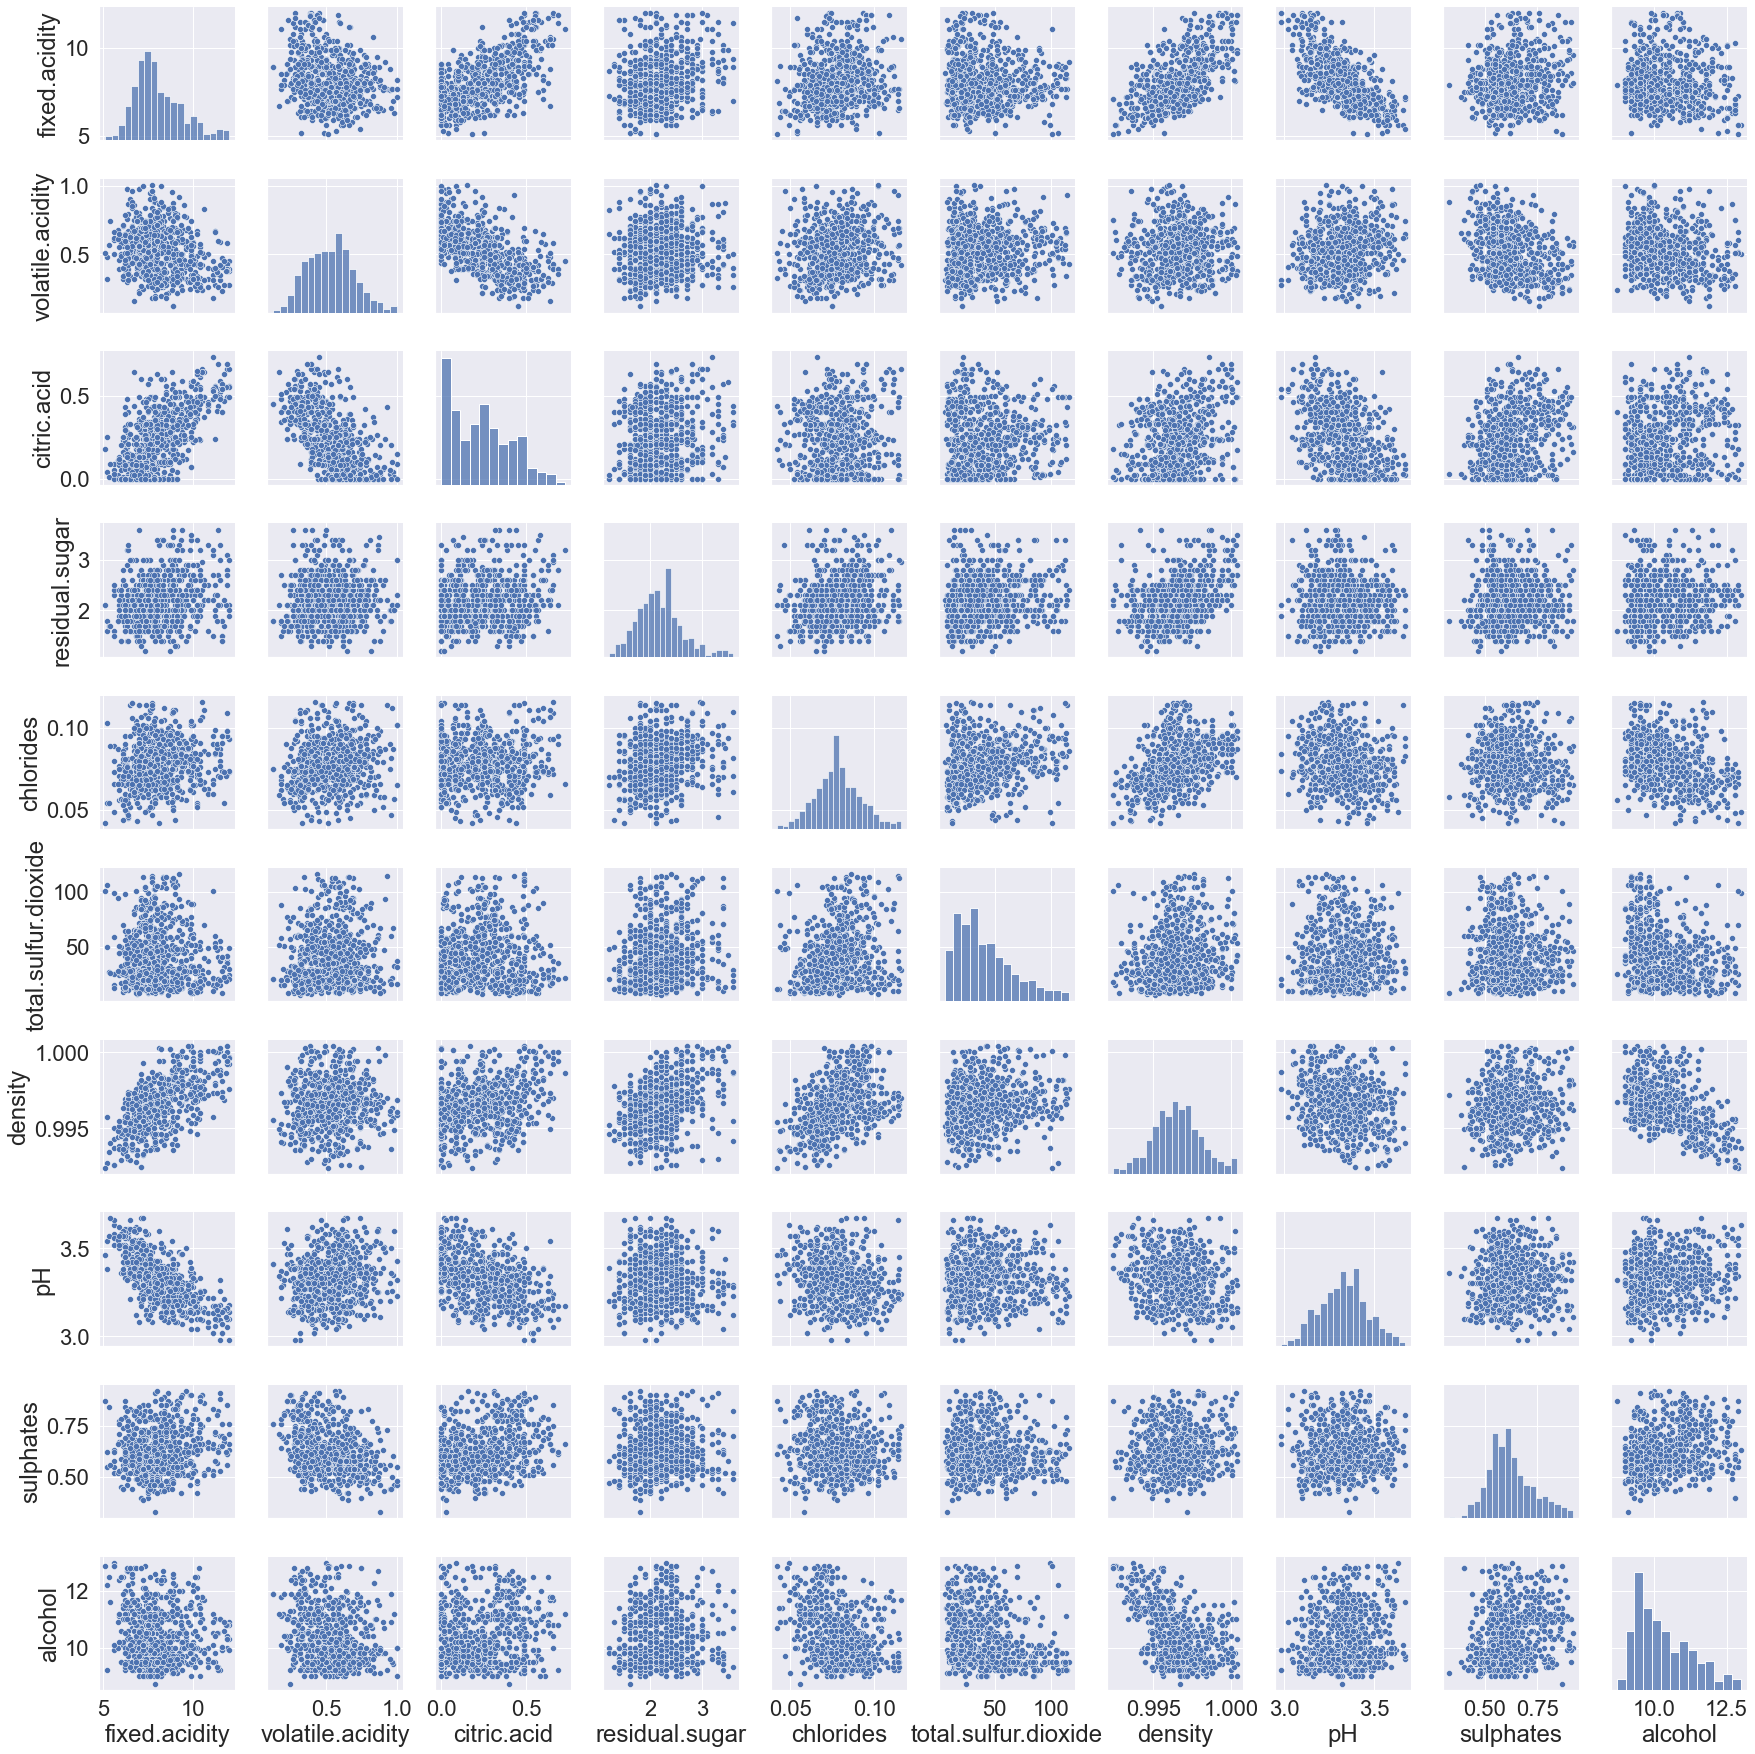

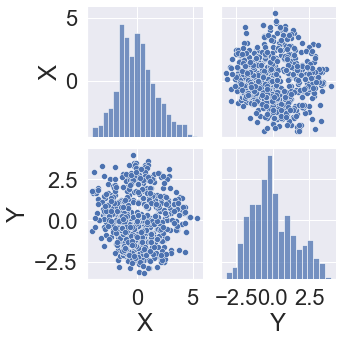

In [254]:
# The Portugal Wine Dataset is imported and the label data column "quality" is dropped. 
data=pd.read_csv("~/Desktop/Machine Learning Module 1/PortugalWineCleaned.csv")
data2=data.drop('quality', axis=1)
# Scaling Data
scaler = StandardScaler()
dataS= scaler.fit_transform(data2)

# Principle Component Analysis for Data Reduction to 2 Dim 
pca=PCA(2) # Dim=2
datapca=pca.fit_transform(dataS) # fit_transform for transforming data using PCA
#print(pca.explained_variance_ratio_.cumsum())
datapcadf=pd.DataFrame(datapca,columns=['X','Y'])
sns.set(font_scale = 2)
sns.pairplot(data2) # Scatter plot of original dataset. No Transformations 
#pairplotPD.fig.set_size_inches(35,35)
sns.pairplot(datapcadf)

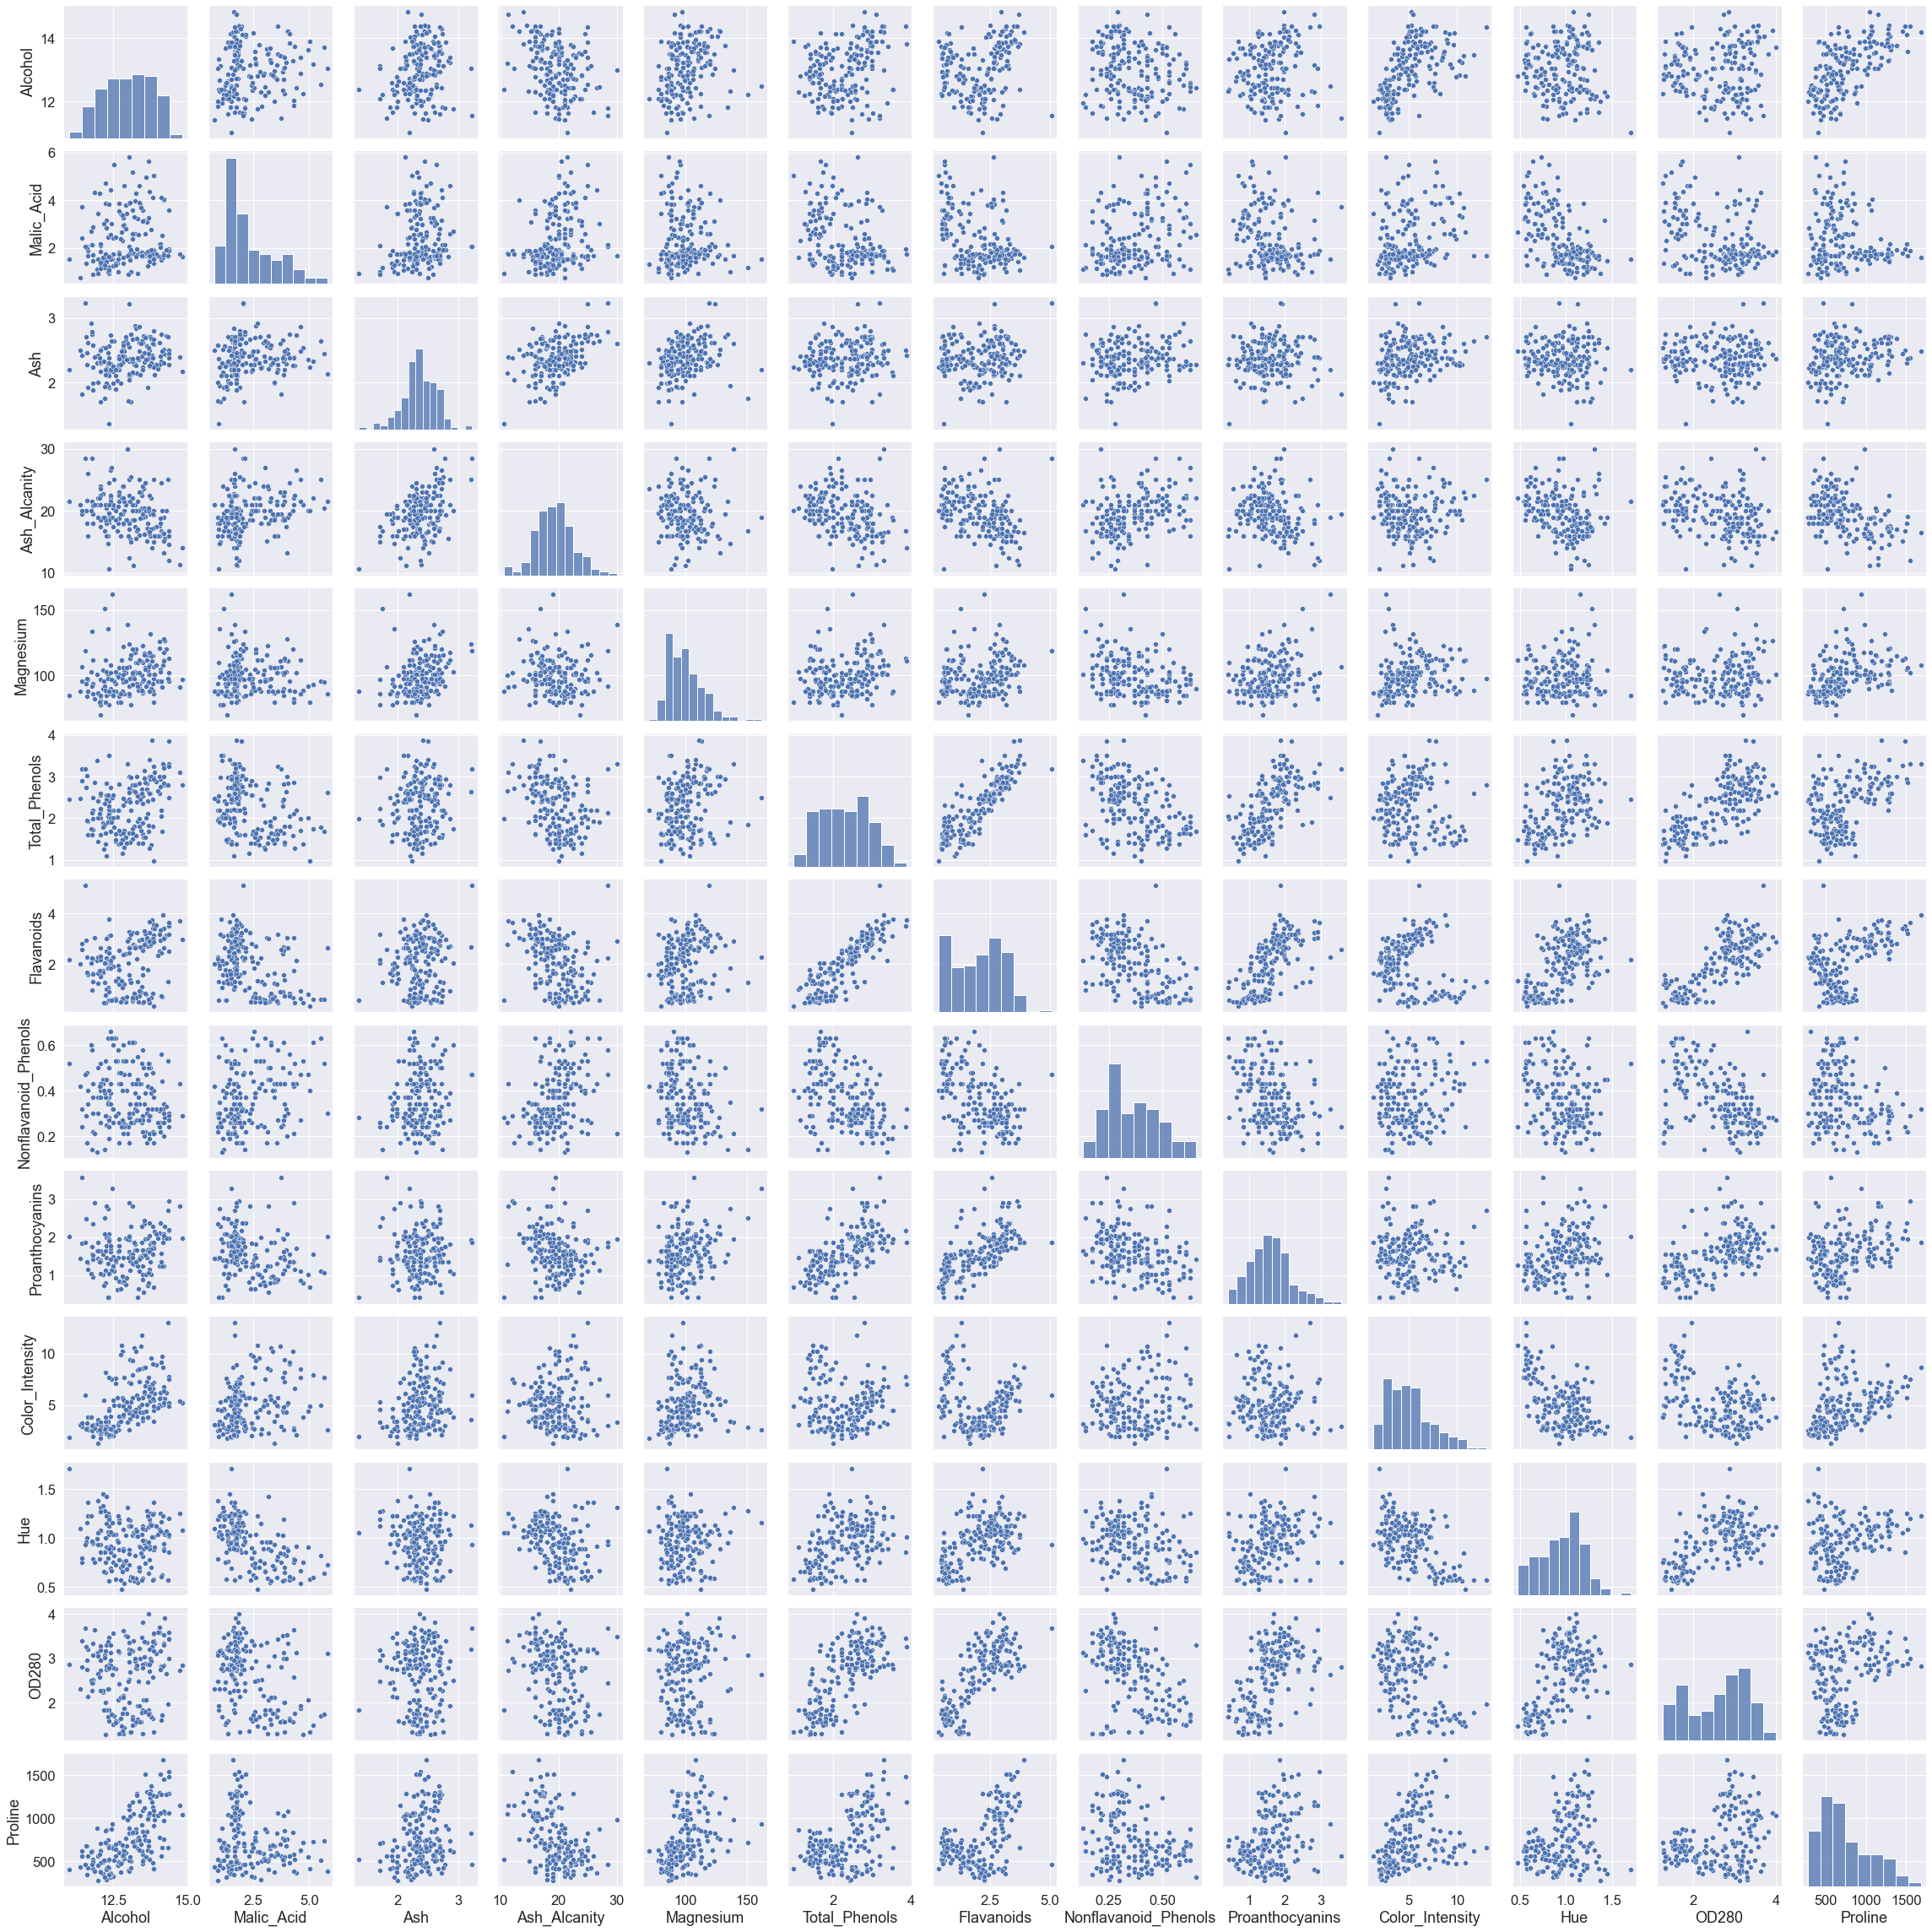

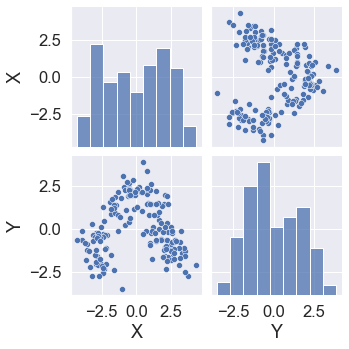

In [252]:
# Chemical Analysis Dataset Initial Data Exploration 
CAdata=pd.read_csv("~/Desktop/Machine Learning Module 1/ChemicalAnalysis.csv")
CAdataS= scaler.fit_transform(CAdata)
pcaCA=PCA(2)
CAdatapca=pcaCA.fit_transform(CAdataS) 
CAdatapcadf=pd.DataFrame(CAdatapca,columns=['X','Y'])
sns.set(font_scale =1.5)
sns.pairplot(CAdata) # Scatter plot of original dataset. NO TRANSFORMATION 
sns.pairplot(CAdatapcadf)

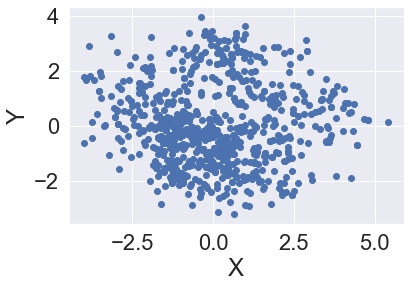

In [176]:
# Original scatter plot of PCA dataset. Portugal Wine Dataset 
plt.scatter(datapca[:,0],datapca[:,1])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

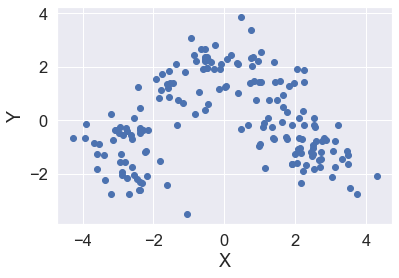

In [146]:
# Original scatter plot of Chemical Analysis 
plt.scatter(x=CAdatapcadf['X'], y=CAdatapcadf['Y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

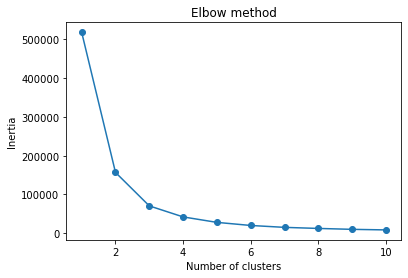

In [99]:
# Implement the Elbow Method to determine optimum value of K, Portugal Wine Dataset
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data2)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
# In this case, it seems like k=3 is the optimum value since it stops decreasing in a linear fashion after. Intertia 
# Elbow Method is implemented on dataset before PCA and scaling. 

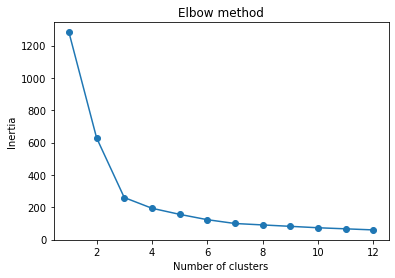

In [100]:
# Implement the Elbow Method to determine optimum value of K, Chemical Analysis  Dataset
inertias = []

for i in range(1,13):
    kmeansCA = KMeans(n_clusters=i)
    kmeansCA.fit(CAdatapca)
    inertias.append(kmeansCA.inertia_)

plt.plot(range(1,13), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
# In this case, it seems like k=3 is the optimum value since it stops decreasing in a linear fashion after. Intertia 
# Elbow Method is implemented on dataset before PCA and scaling. 

<Figure size 432x288 with 0 Axes>

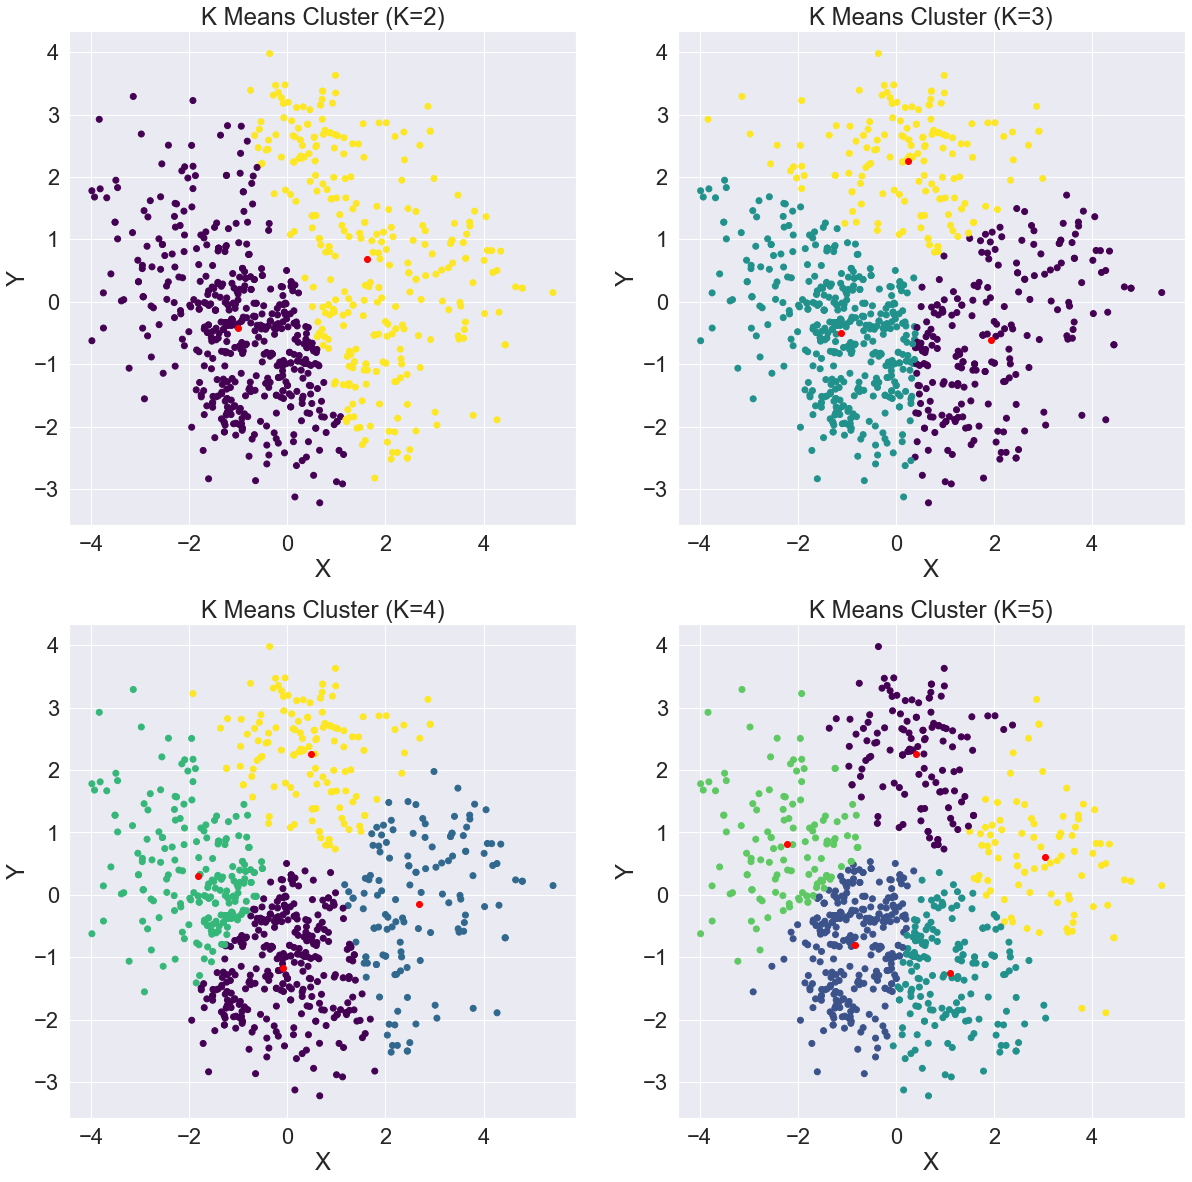

In [193]:
# K MeansClustering with N=2, Portugal Wine Dataset
kmeansmodel2= KMeans(n_clusters=2).fit(datapca)
label2=kmeansmodel2.predict(datapca)
# Centroid Plotting 
centroids2 = kmeansmodel2.cluster_centers_

# K MeansClustering with N=3, Portugal Wine Dataset
kmeansmodel3= KMeans(n_clusters=3).fit(datapca)
label3=kmeansmodel3.predict(datapca)
# Centroid Plotting 
centroids3 = kmeansmodel3.cluster_centers_

# K MeansClustering with N=4, Portugal Wine Dataset
kmeansmodel4= KMeans(n_clusters=4).fit(datapca)
label4=kmeansmodel4.predict(datapca)
# Centroid Plotting 
centroids4 = kmeansmodel4.cluster_centers_

# K MeansClustering with N=5, Portugal Wine Dataset
kmeansmodel5= KMeans(n_clusters=5).fit(datapca)
label5=kmeansmodel5.predict(datapca)
# Centroid Plotting 
centroids5 = kmeansmodel5.cluster_centers_


f=plt.figure()
f,axes=plt.subplots(2,2, figsize=(20,20))
axes[0][0].scatter(datapca[:, 0], datapca[:, 1], c=label2, cmap="viridis")
axes[0][0].scatter(centroids2[:, 0], centroids2[:, 1],color="Red")
axes[0][0].set_title("K Means Cluster (K=2)")
axes[0][0].set_xlabel("X")
axes[0][0].set_ylabel("Y")

axes[0][1].scatter(datapca[:, 0], datapca[:, 1], c=label3, cmap="viridis")
axes[0][1].scatter(centroids3[:, 0], centroids3[:, 1],color="Red")
axes[0][1].set_title("K Means Cluster (K=3)")
axes[0][1].set_xlabel("X")
axes[0][1].set_ylabel("Y")

axes[1][0].scatter(datapca[:, 0], datapca[:, 1], c=label4, cmap="viridis")
axes[1][0].scatter(centroids4[:, 0], centroids4[:, 1],color="Red")
axes[1][0].set_title("K Means Cluster (K=4)")
axes[1][0].set_xlabel("X")
axes[1][0].set_ylabel("Y")

axes[1][1].scatter(datapca[:, 0], datapca[:, 1], c=label5, cmap="viridis")
axes[1][1].scatter(centroids5[:, 0], centroids5[:, 1],color="Red")
axes[1][1].set_title("K Means Cluster (K=5)")
axes[1][1].set_xlabel("X")
axes[1][1].set_ylabel("Y")
plt.show()

In [194]:
# Silhouette Score for Portugal Data 
from sklearn.metrics import silhouette_samples, silhouette_score
# Calculate Silhoutte Score K=2
#
score = silhouette_score(datapca, kmeansmodel2.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

# Calculate Silhoutte Score K=3
#
score = silhouette_score(datapca, kmeansmodel3.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

# Calculate Silhoutte Score K=4
#
score = silhouette_score(datapca, kmeansmodel4.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

# Calculate Silhoutte Score K=5
#
score = silhouette_score(datapca, kmeansmodel5.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.380
Silhouetter Score: 0.397
Silhouetter Score: 0.382
Silhouetter Score: 0.371


<Figure size 432x288 with 0 Axes>

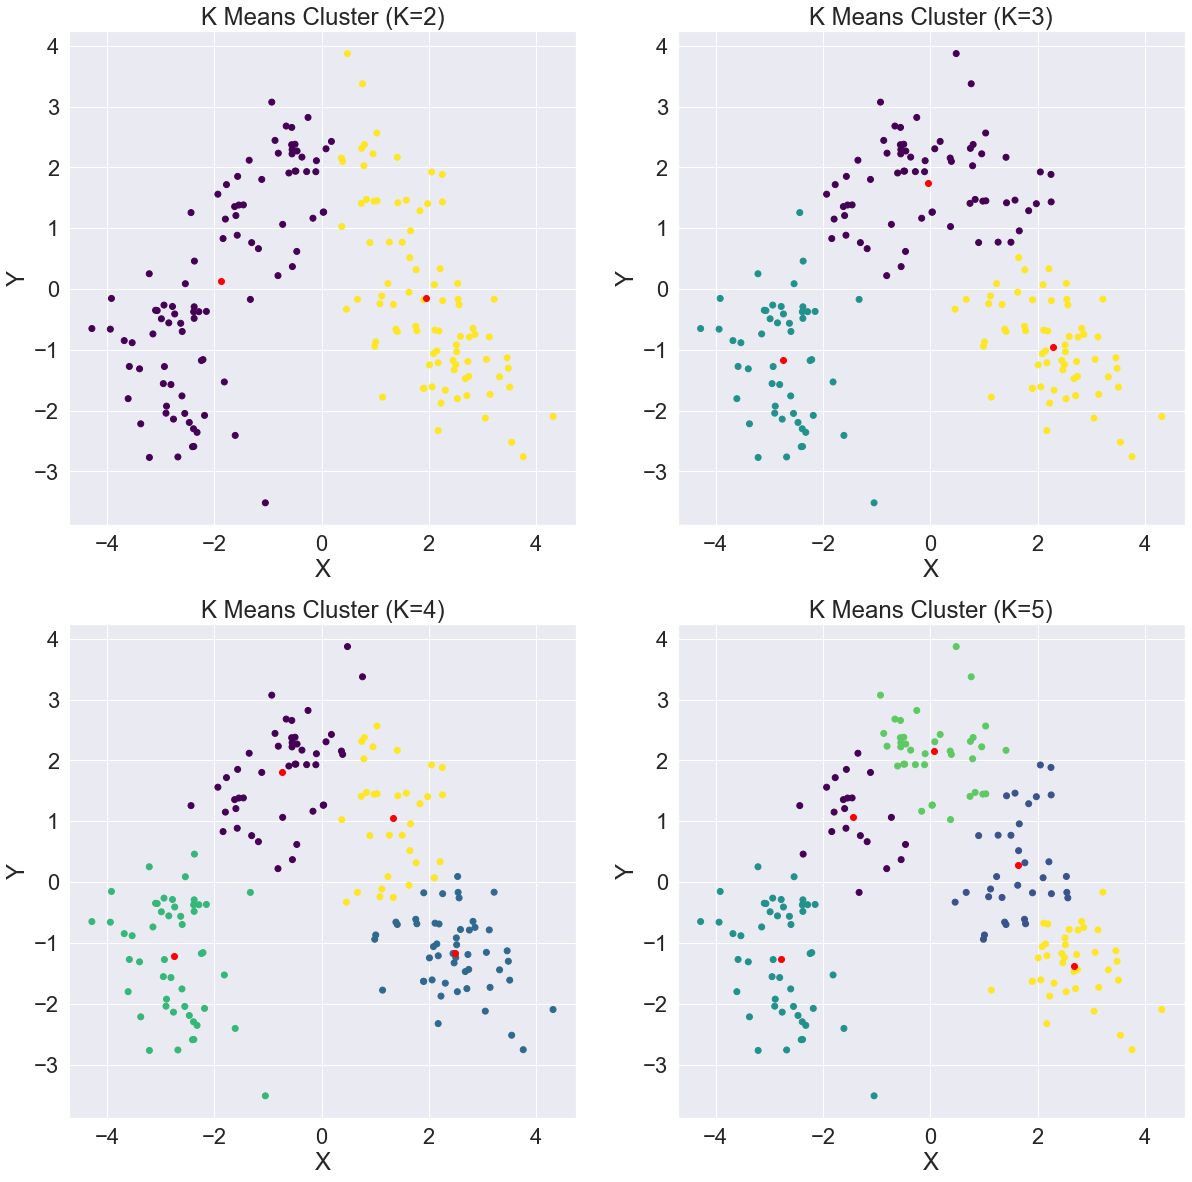

In [197]:
# K MeansClustering with N=2, Chemical Analysis 
kmeansmodelCA2= KMeans(n_clusters=2).fit(CAdatapca)
labelCA2=kmeansmodelCA2.predict(CAdatapca)

# Centroid Plotting 
centroidsCA2 = kmeansmodelCA2.cluster_centers_

# K MeansClustering with N=3, Chemical Analysis 
kmeansmodelCA3= KMeans(n_clusters=3).fit(CAdatapca)
labelCA3=kmeansmodelCA3.predict(CAdatapca)
centroidsCA3 = kmeansmodelCA3.cluster_centers_

# K MeansClustering with N=4, Chemical Analysis 
kmeansmodelCA4= KMeans(n_clusters=4).fit(CAdatapca)
labelCA4=kmeansmodelCA4.predict(CAdatapca)
centroidsCA4 = kmeansmodelCA4.cluster_centers_

# K MeansClustering with N=5, Chemical Analysis 
kmeansmodelCA5= KMeans(n_clusters=5).fit(CAdatapca)
labelCA5=kmeansmodelCA5.predict(CAdatapca)
centroidsCA5 = kmeansmodelCA5.cluster_centers_



f=plt.figure()
f,axes=plt.subplots(2,2, figsize=(20,20))
axes[0][0].scatter(CAdatapca[:, 0], CAdatapca[:, 1], c=labelCA2, cmap="viridis")
axes[0][0].scatter(centroidsCA2[:, 0], centroidsCA2[:, 1],color="Red")
axes[0][0].set_title("K Means Cluster (K=2)")
axes[0][0].set_xlabel("X")
axes[0][0].set_ylabel("Y")

axes[0][1].scatter(CAdatapca[:, 0], CAdatapca[:, 1], c=labelCA3, cmap="viridis")
axes[0][1].scatter(centroidsCA3[:, 0], centroidsCA3[:, 1],color="Red")
axes[0][1].set_title("K Means Cluster (K=3)")
axes[0][1].set_xlabel("X")
axes[0][1].set_ylabel("Y")

axes[1][0].scatter(CAdatapca[:, 0], CAdatapca[:, 1], c=labelCA4, cmap="viridis")
axes[1][0].scatter(centroidsCA4[:, 0], centroidsCA4[:, 1],color="Red")
axes[1][0].set_title("K Means Cluster (K=4)")
axes[1][0].set_xlabel("X")
axes[1][0].set_ylabel("Y")

axes[1][1].scatter(CAdatapca[:, 0], CAdatapca[:, 1], c=labelCA5, cmap="viridis")
axes[1][1].scatter(centroidsCA5[:, 0], centroidsCA5[:, 1],color="Red")
axes[1][1].set_title("K Means Cluster (K=5)")
axes[1][1].set_xlabel("X")
axes[1][1].set_ylabel("Y")
plt.show()

In [198]:
# Silhouette Score for Chemical Analysis 
# Calculate Silhoutte Score K=2
score = silhouette_score(CAdatapca, kmeansmodelCA2.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)
# Calculate Silhoutte Score K=3
score = silhouette_score(CAdatapca, kmeansmodelCA3.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)
# Calculate Silhoutte Score K=4
score = silhouette_score(CAdatapca, kmeansmodelCA4.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)
# Calculate Silhoutte Score K=5
score = silhouette_score(CAdatapca, kmeansmodelCA5.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.465
Silhouetter Score: 0.560
Silhouetter Score: 0.491
Silhouetter Score: 0.441


Text(0, 0.5, 'Y')

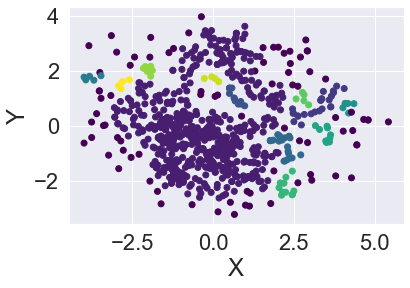

In [243]:
# Density Based Clustering for Portugal Wine Data
from sklearn.cluster import DBSCAN
DBSCAN_cluster = DBSCAN(eps=0.3, min_samples=4).fit(datapca)
clusters = DBSCAN_cluster.fit_predict(datapca)

plt.scatter(datapca[:, 0], datapca[:, 1], c=clusters,cmap="viridis")
plt.xlabel('X')
plt.ylabel('Y')

Text(0, 0.5, 'Y')

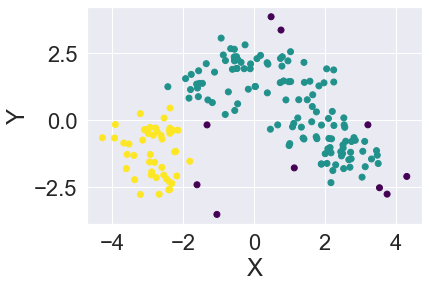

In [242]:
# Density Based Clustering for Chemical Analysis Data 
DBSCAN_clusterCA = DBSCAN(eps=0.6, min_samples=4).fit(CAdatapca)
clustersDCA = DBSCAN_clusterCA.fit_predict(CAdatapca)

plt.scatter(CAdatapca[:, 0], CAdatapca[:, 1], c=clustersDCA,cmap="viridis")
plt.xlabel('X')
plt.ylabel('Y')

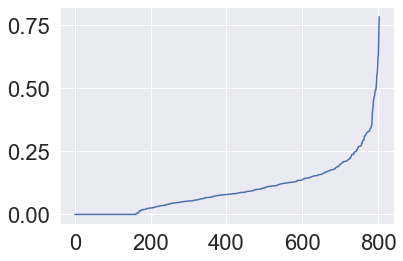

In [204]:
#Eps value plot. Maximum curvature for Portugal Wine Dataset
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(datapca)
distances, indices = nbrs.kneighbors(datapca)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances,cmap="viridis")

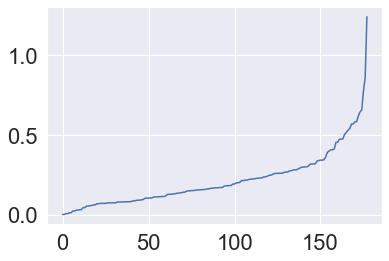

In [207]:
# Eps value plot. Maximum curvature for Chemical Analysis Dataset
neighCA = NearestNeighbors(n_neighbors=2)
nbrsCA = neighCA.fit(CAdatapca)
distancesCA, indicesCA = nbrsCA.kneighbors(CAdatapca)
distancesCA = np.sort(distancesCA, axis=0)
distancesCA = distancesCA[:,1]
plt.plot(distancesCA)

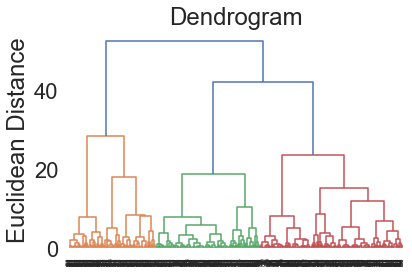

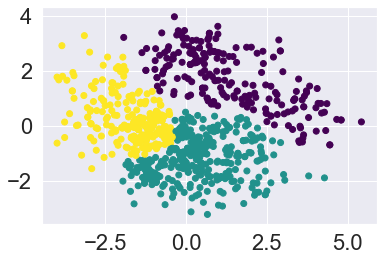

In [241]:
# Hierarchical Clustering (Euclidean Distance), Portugal Wine Dataset
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
linkage_data = linkage(datapca, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.ylabel("Euclidean Distance")
plt.title("Dendrogram")
plt.show()

# Agglomerative Clustering 
agg_clustering = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
 
#Predicting the labels
 
labels = agg_clustering.fit_predict(datapca)
plt.scatter(datapcadf['X'], datapcadf['Y'], c=agg_clustering.labels_,cmap="viridis") 

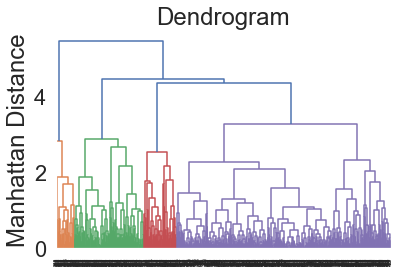

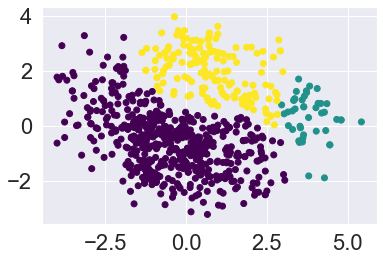

In [255]:
# Hierarchical Clustering (Manhattan Distance), Portugal Wine Dataset
linkage_dataMAN = linkage(datapca ,method='average', metric="cityblock")
dendrogram(linkage_dataMAN)
plt.ylabel("Manhattan Distance")
plt.title("Dendrogram")
plt.show()

# Agglomerative Clustering 
agg_clusteringMAN = AgglomerativeClustering(n_clusters = 3, affinity = 'cityblock', linkage='average')
 
#predicting the labels
 
labelsMAN = agg_clusteringMAN.fit_predict(datapca)
 
plt.scatter(datapcadf['X'], datapcadf['Y'], c=agg_clusteringMAN.labels_,cmap="viridis") 

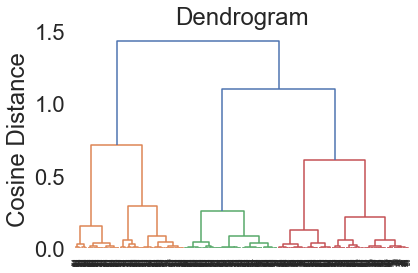

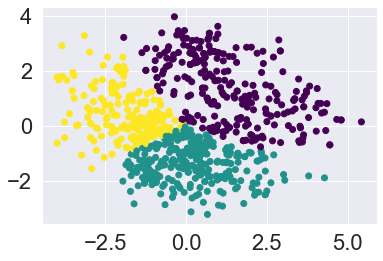

In [248]:
# Hierarchical Clustering (Cosine Distance), Portugal Wine Dataset
linkage_dataCOS = linkage(datapca ,method='average', metric="cosine")
dendrogram(linkage_dataCOS)
plt.ylabel("Cosine Distance")
plt.title("Dendrogram")
plt.show()

# Agglomerative Clustering 
agg_clusteringCOS = AgglomerativeClustering(n_clusters = 3, affinity = 'cosine', linkage='average')
 
#predicting the labels
 
labelsCOS = agg_clusteringCOS.fit_predict(datapca)
 
plt.scatter(datapcadf['X'], datapcadf['Y'], c=agg_clusteringCOS.labels_,cmap="viridis") 

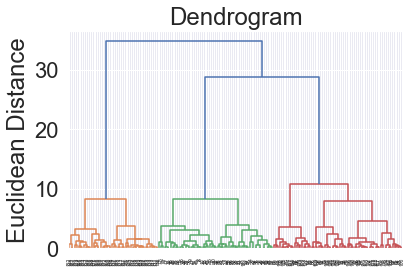

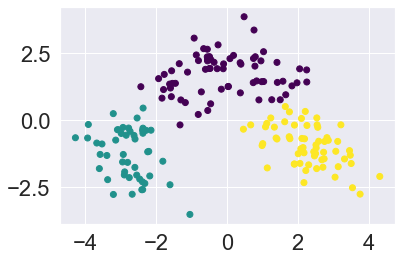

In [246]:
# Hierarchical Clustering (Euclidean Distance), Chemical Analysis Dataset
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
linkage_dataCA = linkage(CAdatapca, method='ward', metric='euclidean')
dendrogram(linkage_dataCA)
plt.ylabel("Euclidean Distance")
plt.title("Dendrogram")
plt.show()

# Agglomerative Clustering 
agg_clusteringCA = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
 
#Predicting the labels
labelsCA = agg_clusteringCA.fit_predict(CAdatapca)
plt.scatter(CAdatapcadf['X'], CAdatapcadf['Y'], c=agg_clusteringCA.labels_,cmap="viridis") 

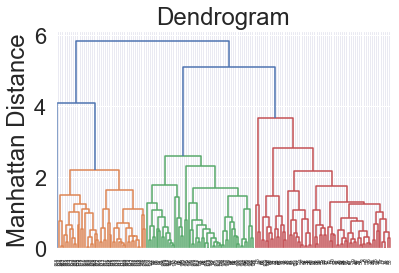

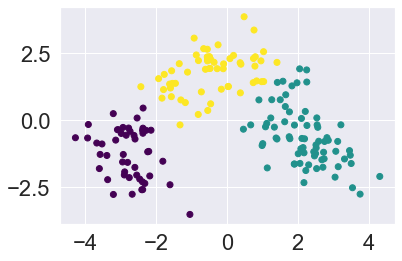

In [247]:
# Hierarchical Clustering (Manhattan Distance), Chemical Analysis Dataset
CAlinkage_dataMAN = linkage(CAdatapca ,method='average', metric="cityblock")
dendrogram(CAlinkage_dataMAN)
plt.ylabel("Manhattan Distance")
plt.title("Dendrogram")
plt.show()

# Agglomerative Clustering 
CAagg_clusteringMAN = AgglomerativeClustering(n_clusters = 3, affinity = 'cityblock', linkage='average')
 
#predicting the labels
 
CAlabelsMAN = CAagg_clusteringMAN.fit_predict(CAdatapca)
 
plt.scatter(CAdatapcadf['X'], CAdatapcadf['Y'], c=CAagg_clusteringMAN.labels_,cmap="viridis") 

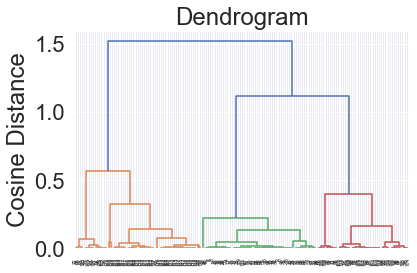

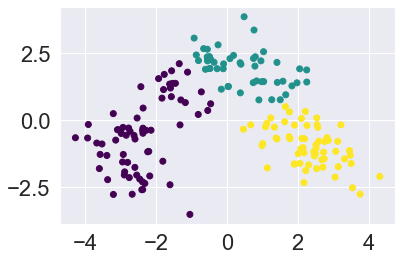

In [249]:
# Hierarchical Clustering (Cosine Distance), Chemical Analysis Dataset
CAlinkage_dataCOS = linkage(CAdatapca ,method='average', metric="cosine")
dendrogram(CAlinkage_dataCOS)
plt.ylabel("Cosine Distance")
plt.title("Dendrogram")
plt.show()

# Agglomerative Clustering 
CAagg_clusteringCOS = AgglomerativeClustering(n_clusters = 3, affinity = 'cosine', linkage='average')
 
#predicting the labels
 
CAlabelsCOS = CAagg_clusteringCOS.fit_predict(CAdatapca)
 
plt.scatter(CAdatapcadf['X'], CAdatapcadf['Y'], c=CAagg_clusteringCOS.labels_,cmap="viridis") 